## Table of Contents
[00. Set Up](#00.-Set-Up)
* [00i. Import Packages](#00i.-Import-Packages)
* [00ii. Connect to S3](#00ii.-Connect-to-S3)

[01. Load Data](#01.-Load-Data)
* [01i. Load Data from S3 (Online)](#01i.-Load-Data-from-S3-(Online))
* [01ii. Load Data by Pandas (Local)](#01ii.-Load-Data-by-Pandas-(Local))
* [01iii. View datasets](#01iii.-View-datasets)

[02. Study Data](#02.-Study-Data)
* [02i. Visualise Distributions](#02i.-Visualise-Distributions)
* [02ii. Find State Matches](#02ii.-Find-State-Matches)
* [02iii. Simple Data Processing](#02iii.-Simple-Data-Processing)
* [02iv. Merging Data](#02iv.-Merging-Data)
* [02v. Visualise Time Plots](#02v.-Visualise-Time-Plots)
* [02vi. Export Data](#02vi.-Export-Data)

[03. Feature Engineering](#03.-Feature-Engineering)
* [03i. Load Data](#03i.-Load-Data)
* [03ii. Create Time Labels](#03ii.-Create-Time-Labels)
* [03iii. Create Lagged Variables](#03iii.-Create-Lagged-Variables)
* [03iv. Create Season Variables](#03iv.-Create-Season-Variables)
* [03v. Other Variables](#03v.-Other-Variables)
* [03vi. Export Data](#03vi.-Export-Data)

[04. Modelling](#04.-Modelling)
* [04i. Import Packages](#04i.-Import-Packages)
* [04ii. Load Data](#04ii.-Load-Data)
* [04iii. Set Model Variables](#04iii.-Set-Model-Variables)
* [04iv. Quick Visualisations](#04iv.-Quick-Visualisations)
* [04v. Train-Test-Val-Split](#04v.-Train-Test-Val-Split)
* [04vi. Train Model](#04vi.-Train-Model)
* [04vii. Predict & Review](#04vii.-Predict-&-Review)

## 00. Set up

### 00i. Import Packages

In [1]:
# import boto3
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# from sagemaker import get_execution_role

### 00ii. Connect to S3

In [2]:
# s3 = boto3.resource('s3')
# # listing buckets
# ! aws s3 ls

In [3]:
# # show files in bucket
# ! aws s3 ls wwcode-covid-datasets/ --recursive

## 01. Load Data

### 01i. Load Data from S3 (Online)

In [4]:
# def load_data_from_s3(bucket, data_key):
#     data_location = 's3://{}/{}'.format(bucket, data_key)
#     data = pd.read_csv(data_location)
#     return data

In [5]:
# role = get_execution_role()
# bucket='wwcode-covid-datasets'

# # covid data figures
# data_key = 'coronadatascraper/202007270201/coronadatascraper-timeseries__202007270201__202007270201.csv.gz'
# covid_df = load_data_from_s3(bucket, data_key)

# # mobility data figures
# data_key = 'apple-mobility-trends-reports/dataset/apple-mobility-trends-reports.csv'
# mobility_df = load_data_from_s3(bucket, data_key)

### 01ii. Load Data by Pandas (Local)

In [2]:
# source: https://aws.amazon.com/marketplace/pp/prodview-vtnf3vvvheqzw?ref_=srh_res_product_title#pricing
covid_df = pd.read_csv('data/coronadatascraper_202007270201_coronadatascraper-timeseries__202007270201__202007270201.csv.gz', compression='gzip', error_bad_lines=False)
# source: https://aws.amazon.com/marketplace/pp/COVID-19-Apple-Mobility-Trends-Reports/prodview-ucdg4nudicxzi#pricing
aapl_mobility_df = pd.read_csv('data/apple-mobility-trends-reports_dataset_apple-mobility-trends-reports.csv')
# source: https://aws.amazon.com/marketplace/pp/Google-COVID-19-Community-Mobility-Reports/prodview-crrq42gujge3k
goog_mobility_df = pd.read_csv('data/Global_Mobility_Report.txt')
# source: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
bts_mobility_df = pd.read_csv('data/Trips_by_Distance.csv')
# source: https://rt.live/
rt_df = pd.read_csv('data/rt.csv')
# source: https://www.kaggle.com/lin0li/us-lockdown-dates-dataset
# initially missing reopening info, add info taken from below
lockdown_df = pd.read_csv('data/lockdown_us.csv')
# source: https://aws.amazon.com/marketplace/pp/COVID-19-United-States-Reopen-and-Shut-Down-Status/prodview-ejbvrkmiwc5so
state_codes = pd.read_csv('data/nyt-states-reopen-status-covid-19.txt', usecols=[0,1], header=0)

### 01iii. View datasets

In [3]:
covid_df.head()

,name,level,city,county,state,country,population,lat,long,url,...,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthfactor,date,last_updated_at,state_fips
0,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22,2020-07-27T02:01:25,NaN
1,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-23,2020-07-27T02:01:25,NaN
2,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-24,2020-07-27T02:01:25,NaN
3,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-25,2020-07-27T02:01:25,NaN
4,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-26,2020-07-27T02:01:25,NaN


In [4]:
aapl_mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,153.00,169.21,178.32,185.37,166.63,162.41,164.63,169.36,190.83,206.45
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,137.78,128.27,137.61,107.59,136.33,127.42,128.96,131.30,133.39,137.95
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,54.05,65.19,63.43,41.21,66.69,54.61,55.66,57.26,67.02,63.70
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,39.18,47.81,43.67,32.06,50.69,43.16,41.49,42.23,49.10,46.25
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,106.12,103.27,84.93,88.73,89.78,92.33,93.33,98.55,98.50,75.84


In [5]:
goog_mobility_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [9]:
bts_mobility_df = bts_mobility_df.merge(state_codes, how='left', left_on='State Postal Code', right_on='state_abbreviation')
bts_mobility_df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,state_abbreviation,state
0,County,2020/07/06,1.0,AL,1001.0,Autauga County,10037.0,45564.0,153720.0,34877.0,...,19325.0,22358.0,28807.0,7093.0,3443.0,1209.0,351.0,32.0,AL,Alabama
1,County,2020/07/06,1.0,AL,1003.0,Baldwin County,42138.0,175884.0,547365.0,104145.0,...,69655.0,87790.0,93527.0,31928.0,9353.0,7697.0,3188.0,377.0,AL,Alabama
2,County,2020/07/06,1.0,AL,1005.0,Barbour County,4039.0,20842.0,74391.0,13459.0,...,10155.0,10947.0,11129.0,6185.0,3292.0,625.0,136.0,0.0,AL,Alabama
3,County,2020/07/06,1.0,AL,1007.0,Bibb County,3508.0,18892.0,59988.0,13862.0,...,6884.0,7900.0,7704.0,7061.0,1501.0,840.0,174.0,55.0,AL,Alabama
4,County,2020/07/06,1.0,AL,1009.0,Blount County,8388.0,49452.0,170776.0,32254.0,...,21186.0,25098.0,29347.0,19206.0,5148.0,1542.0,419.0,173.0,AL,Alabama


In [7]:
rt_df = rt_df.merge(state_codes, how='left', left_on='region', right_on='state_abbreviation')
rt_df.head()

,date,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests,new_tests,new_cases,new_deaths,state_abbreviation,state
0,2020-03-02,ME,0,1.364230,1.350196,1.141386,1.567044,55.273425,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
1,2020-03-03,ME,1,1.357175,1.346643,1.136603,1.547448,0.538724,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
2,2020-03-04,ME,2,1.351634,1.340184,1.142682,1.547002,7.637654,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
3,2020-03-05,ME,3,1.345538,1.337814,1.167782,1.557326,14.489647,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
4,2020-03-06,ME,4,1.337298,1.327954,1.159661,1.525446,15.583612,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine


In [8]:
lockdown_df.head()

,Country,State,County,Date,Type
0,United States,Alabama,NaN,4/4/2020,Stay at home
1,United States,Alabama,Birmingham,24/3/2020,Shelter in place
2,United States,Alaska,NaN,28/3/2020,Stay at home
3,United States,Arizona,NaN,31/3/2020,Stay at home
4,United States,California,NaN,19/3/2020,Stay at home


## 02. Study Data

### 02i. Visualise Distributions

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
def get_data_info_by_columns(data, cols = 'unspecified'):
    if cols == 'unspecified':
        cols = data.columns
    for col in cols:
        print('Displaying info for column "'+col+'"...')
        if np.issubdtype(data[col].dtype, np.number):
            ax = sns.distplot(data[col])
        else:
            ax = sns.countplot(x=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.show()

Displaying info for column "name"...


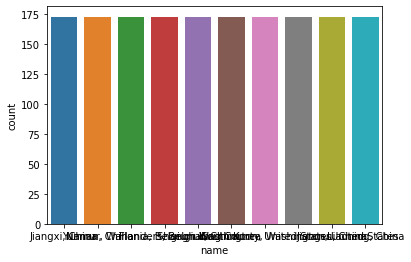

Displaying info for column "level"...


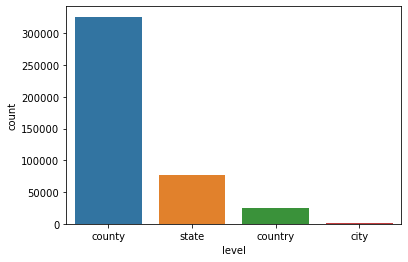

Displaying info for column "city"...


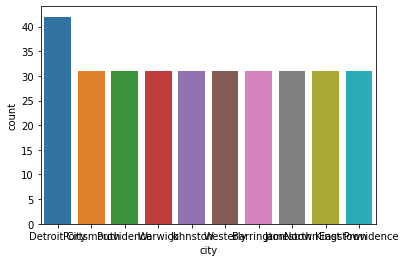

Displaying info for column "county"...


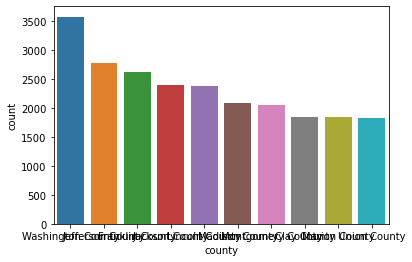

Displaying info for column "state"...


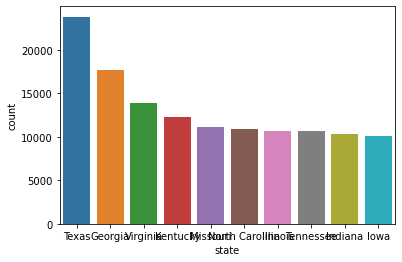

Displaying info for column "country"...


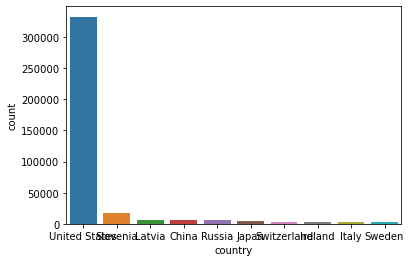

Displaying info for column "population"...


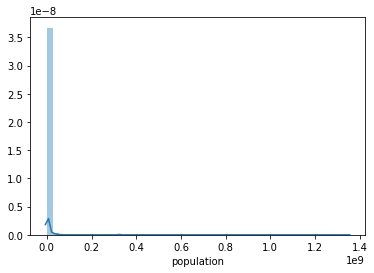

Displaying info for column "lat"...


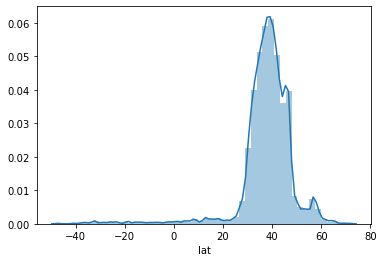

Displaying info for column "long"...


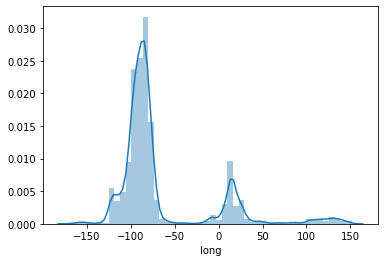

Displaying info for column "url"...


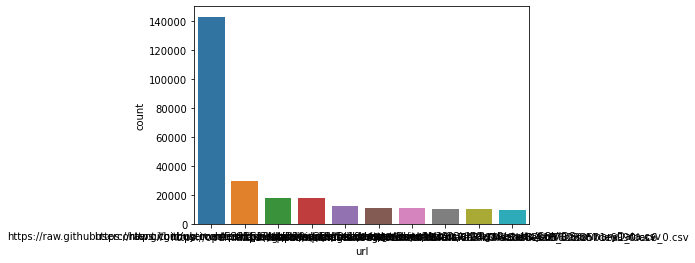

Displaying info for column "aggregate"...


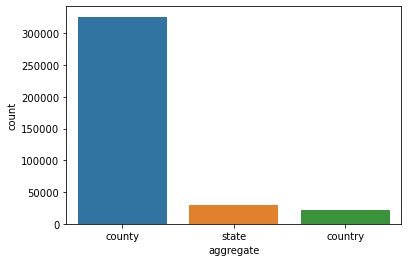

Displaying info for column "tz"...


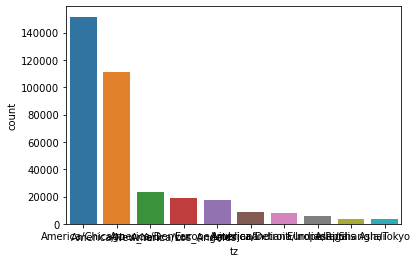

Displaying info for column "cases"...


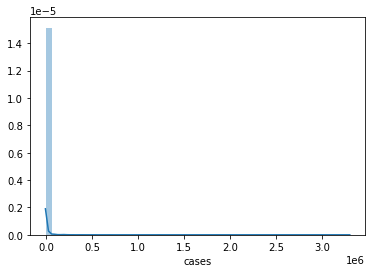

Displaying info for column "deaths"...


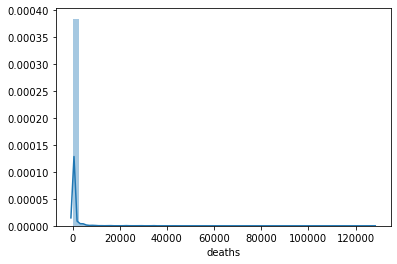

Displaying info for column "recovered"...


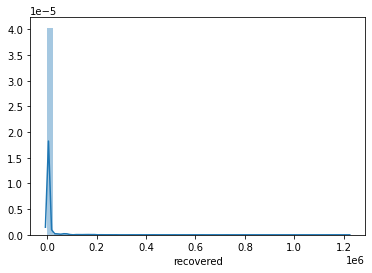

Displaying info for column "active"...


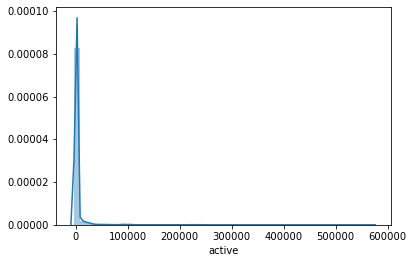

Displaying info for column "tested"...


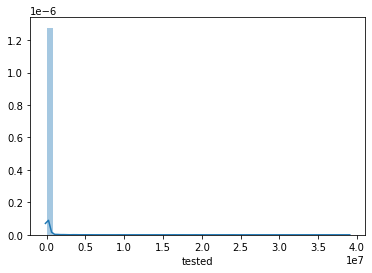

Displaying info for column "hospitalized"...


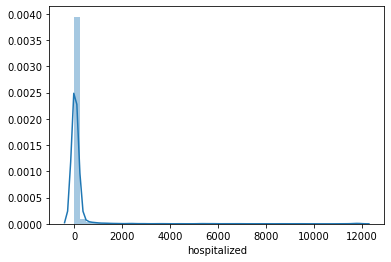

Displaying info for column "hospitalized_current"...


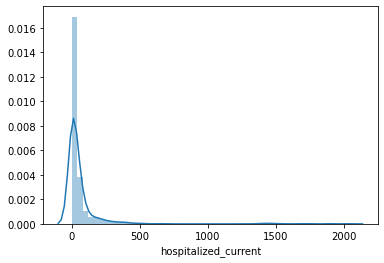

Displaying info for column "discharged"...


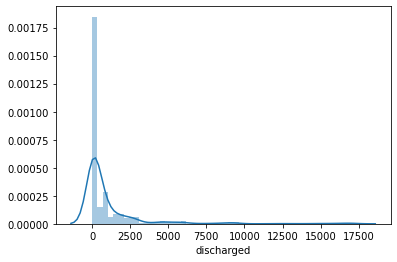

Displaying info for column "icu"...


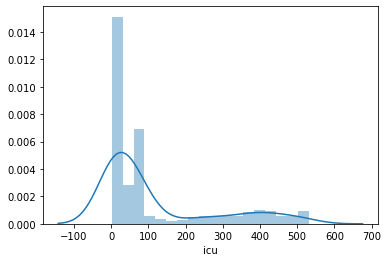

Displaying info for column "icu_current"...


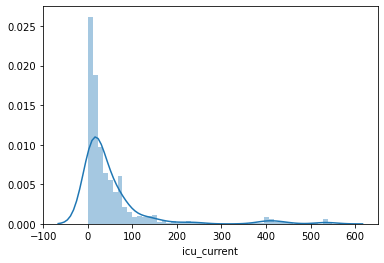

Displaying info for column "growthfactor"...


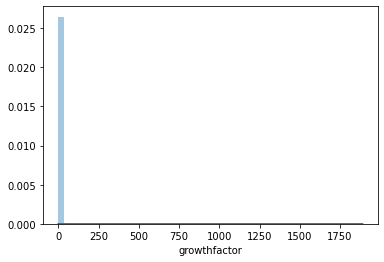

Displaying info for column "date"...


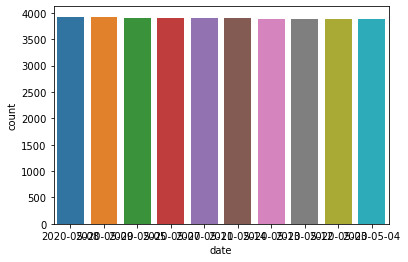

Displaying info for column "last_updated_at"...


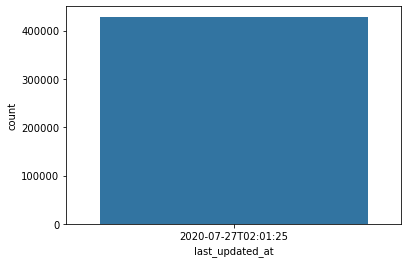

Displaying info for column "state_fips"...


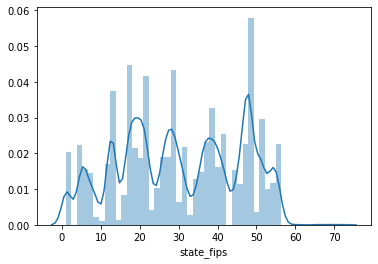

In [14]:
get_data_info_by_columns(covid_df)

In [15]:
print(aapl_mobility_df.columns)

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
       '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25'],
      dtype='object', length=201)


Displaying info for column "geo_type"...


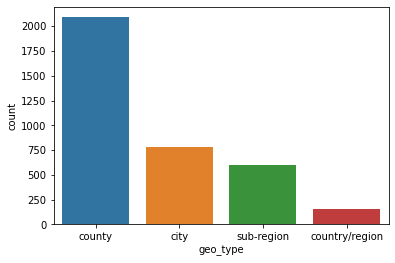

Displaying info for column "region"...


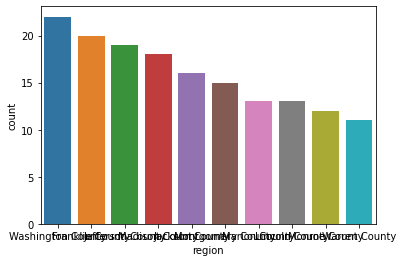

Displaying info for column "transportation_type"...


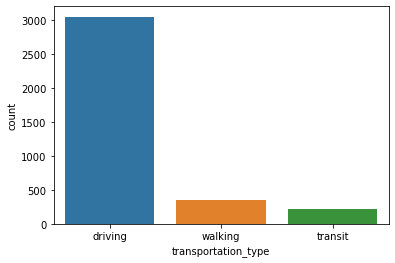

Displaying info for column "alternative_name"...


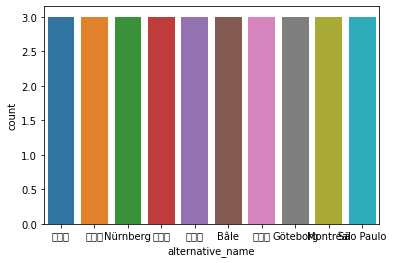

Displaying info for column "sub-region"...


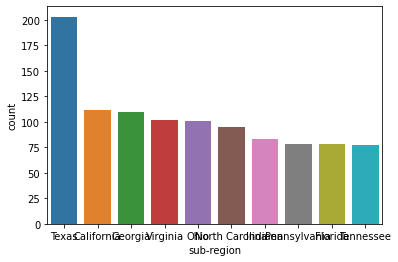

Displaying info for column "country"...


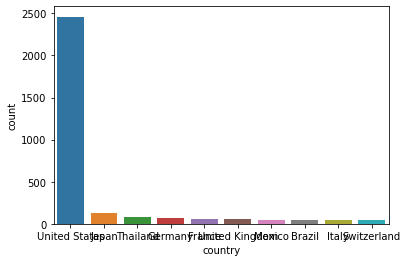

Displaying info for column "2020-01-13"...


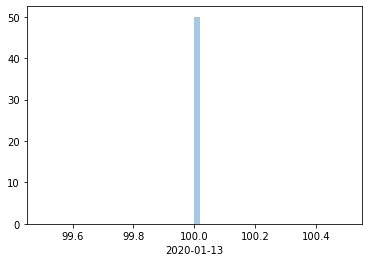

Displaying info for column "2020-01-14"...


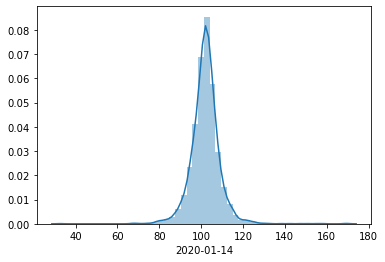

Displaying info for column "2020-01-15"...


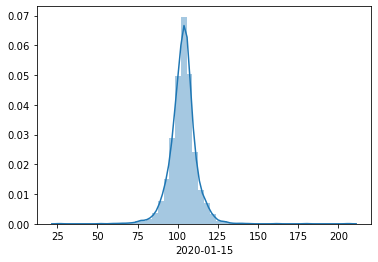

Displaying info for column "2020-07-23"...


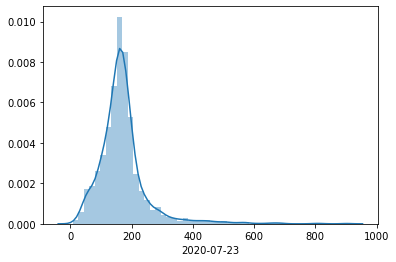

Displaying info for column "2020-07-24"...


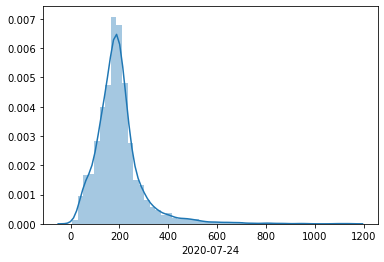

Displaying info for column "2020-07-25"...


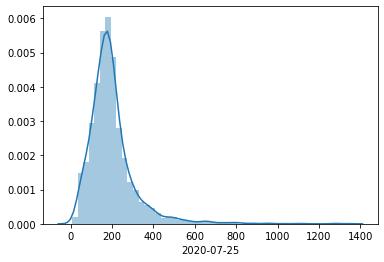

In [72]:
get_data_info_by_columns(aapl_mobility_df, cols=['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 
                                            'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-07-23', '2020-07-24', '2020-07-25'])

Displaying info for column "country_region_code"...


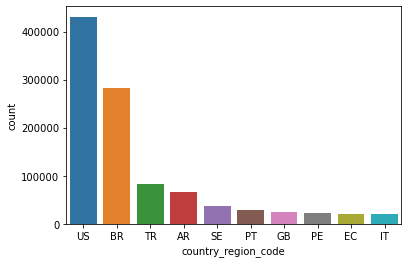

Displaying info for column "country_region"...


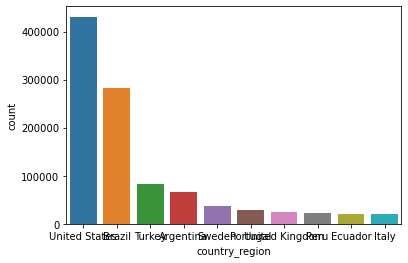

Displaying info for column "sub_region_1"...


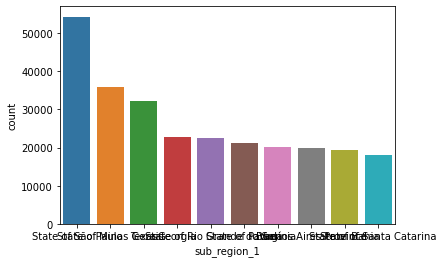

Displaying info for column "sub_region_2"...


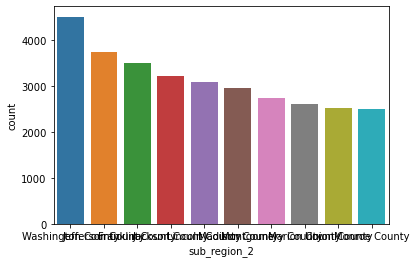

Displaying info for column "metro_area"...


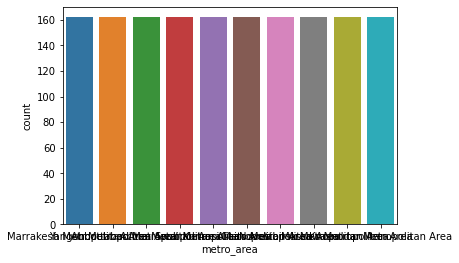

Displaying info for column "iso_3166_2_code"...


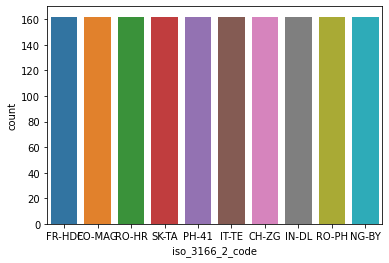

Displaying info for column "census_fips_code"...


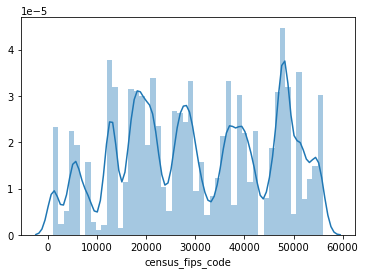

Displaying info for column "date"...


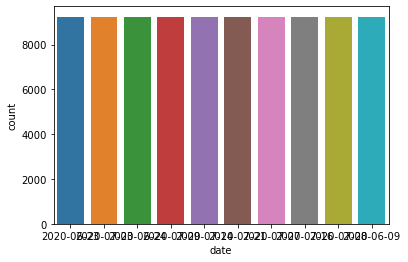

Displaying info for column "retail_and_recreation_percent_change_from_baseline"...


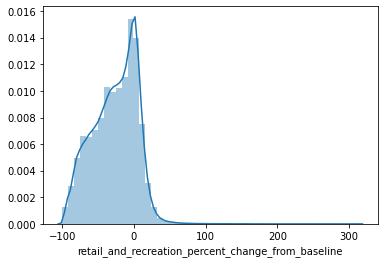

Displaying info for column "grocery_and_pharmacy_percent_change_from_baseline"...


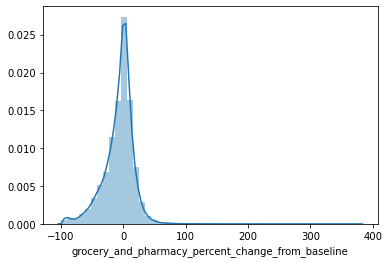

Displaying info for column "parks_percent_change_from_baseline"...


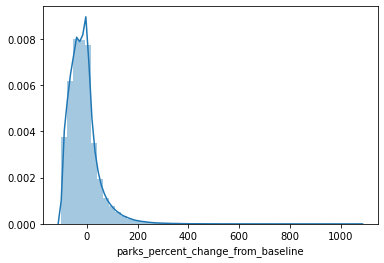

Displaying info for column "transit_stations_percent_change_from_baseline"...


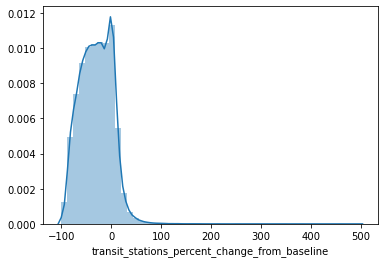

Displaying info for column "workplaces_percent_change_from_baseline"...


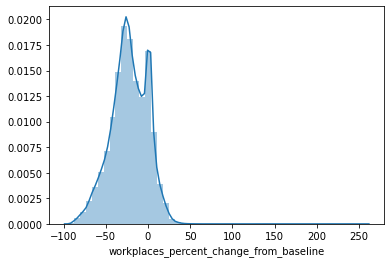

Displaying info for column "residential_percent_change_from_baseline"...


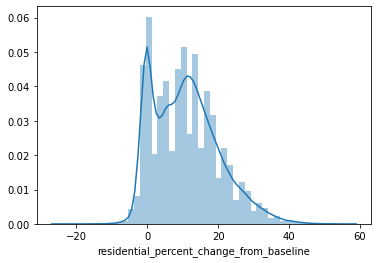

In [18]:
get_data_info_by_columns(goog_mobility_df)

Displaying info for column "Level"...


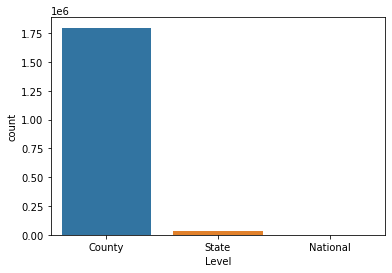

Displaying info for column "Date"...


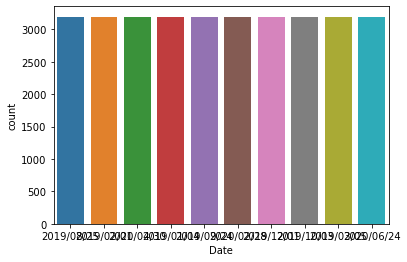

Displaying info for column "State FIPS"...


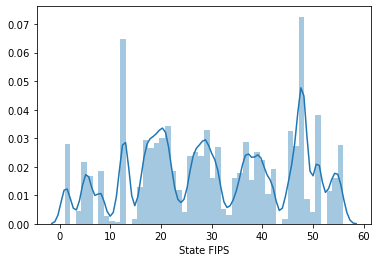

Displaying info for column "State Postal Code"...


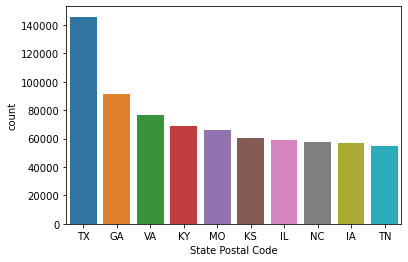

Displaying info for column "County FIPS"...


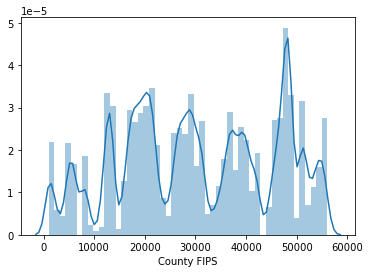

Displaying info for column "County Name"...


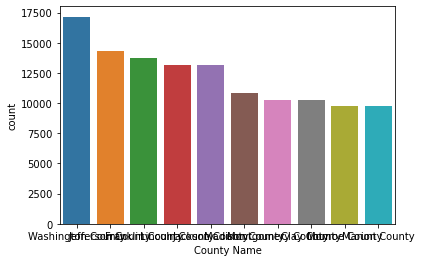

Displaying info for column "Population Staying at Home"...


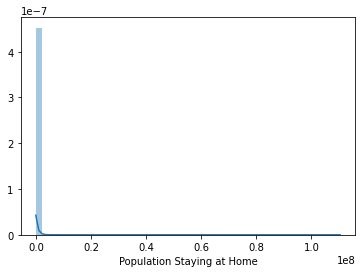

Displaying info for column "Population Not Staying at Home"...


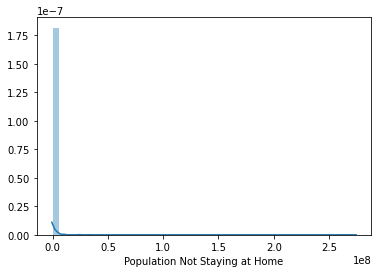

Displaying info for column "Number of Trips"...


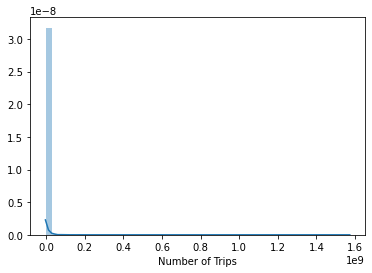

Displaying info for column "Number of Trips <1"...


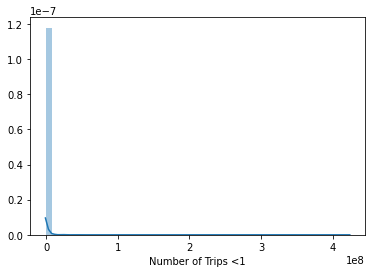

Displaying info for column "Number of Trips 1-3"...


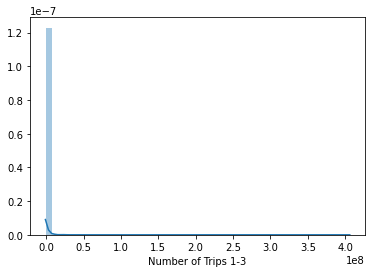

Displaying info for column "Number of Trips 3-5"...


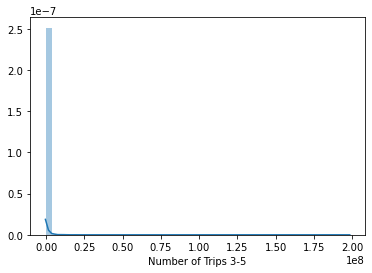

Displaying info for column "Number of Trips 5-10"...


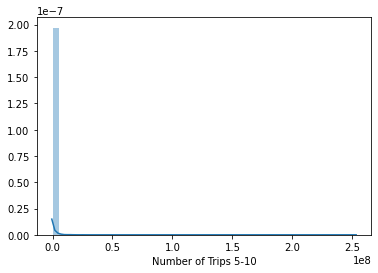

Displaying info for column "Number of Trips 10-25"...


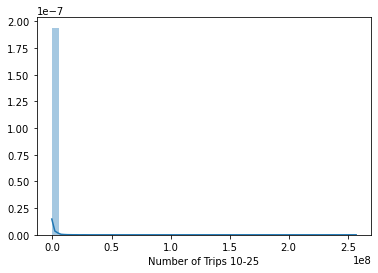

Displaying info for column "Number of Trips 25-50"...


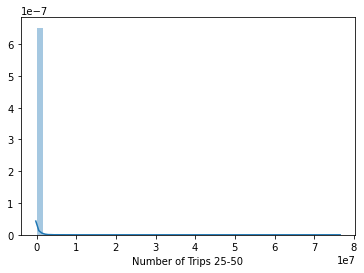

Displaying info for column "Number of Trips 50-100"...


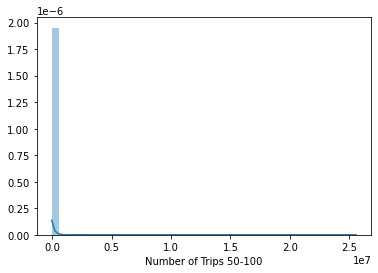

Displaying info for column "Number of Trips 100-250"...


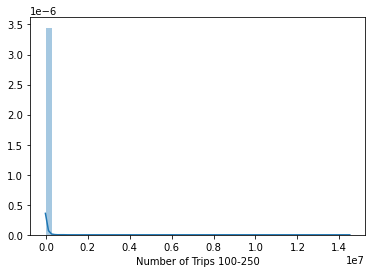

Displaying info for column "Number of Trips 250-500"...


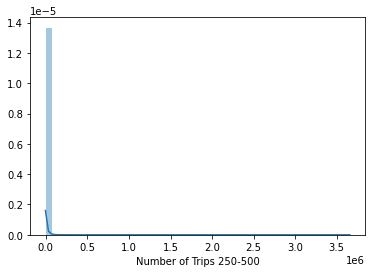

Displaying info for column "Number of Trips >=500"...


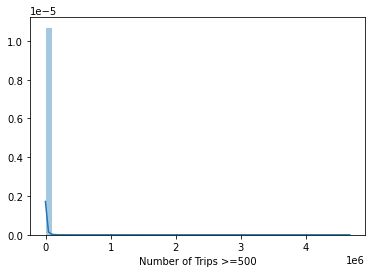

Displaying info for column "state_abbreviation"...


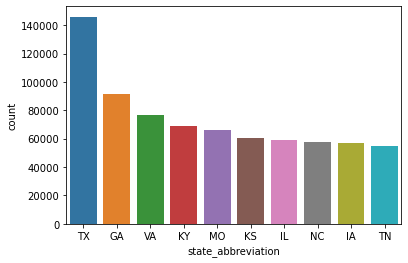

Displaying info for column "state"...


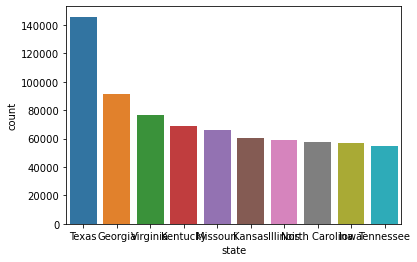

In [16]:
get_data_info_by_columns(bts_mobility_df)

### 02ii. Find State Matches

In [19]:
# filter by usa 
usa_covid_df = covid_df[covid_df['country']=='United States']
usa_aapl_df = aapl_mobility_df[aapl_mobility_df['country']=='United States']
usa_goog_df = goog_mobility_df[goog_mobility_df['country_region']=='United States']

In [20]:
def state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, missing_val = ""):
    # get list of states per dataset
    usa_covid_states = list(set(usa_covid_df['state']))
    usa_goog_states = list(set(usa_goog_df['sub_region_1']))
    usa_aapl_states = list(set(usa_aapl_df['sub-region']))
    bts_df_states = list(set(bts_mobility_df['state']))
    rt_df_states = list(set(rt_df['state']))
    lockdown_df_states = list(set(lockdown_df['State']))

    # get unique list of states across datasets
    list_of_states = list(set(usa_covid_states+usa_goog_states+usa_aapl_states+bts_df_states+rt_df_states+lockdown_df_states))

    state_checking_df = pd.DataFrame()
    state_checking_df['state_names'] = list_of_states

    for state_list, data_name in zip([usa_covid_states, usa_goog_states, usa_aapl_states, bts_df_states, rt_df_states, lockdown_df_states], 
                                     ['covid_cases', 'google_mob', 'apple_mob', 'bts_mob', 'risk_trans', 'lockdown']):
        state_checking_df[data_name]=[missing_val if i in state_list else "Missing" for i in list_of_states]
    
    return state_checking_df

In [22]:
# eye-ball state name discrepancies
state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df)

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown
0,NaN,,,,,Missing,Missing
1,Maryland,,,,,,
2,Oklahoma,,,,,,
3,Kansas,,,,,,
4,Pennsylvania,,,,,,
5,Massachusetts,,,,,,
6,Vermont,,,,,,
7,West Virginia,,,,,,
8,Illinois,,,,,,
9,Virgin Islands,Missing,Missing,,Missing,Missing,Missing


### 02iii. Simple Data Processing

##### based on above investigation, correct State spellings for some datasets

In [24]:
# replace following, rest are ignored
find_and_replace_dictionary = {
    'Washington, D.C.': 'District of Columbia',
    'United States Virgin Islands': 'Virgin Islands',
}
usa_covid_df['state'] = usa_covid_df['state'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_goog_df['sub_region_1'] = usa_goog_df['sub_region_1'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_aapl_df['sub-region'] = usa_aapl_df['sub-region'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)

# check if improved (rt will be baseline to get states from)
# eye-ball state name discrepancies
state_checking_df = state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, missing_val=np.nan)
state_checking_df[state_checking_df['risk_trans']!='Missing'].dropna(how='all', subset=[i for i in state_checking_df if i!='state_names'])

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown
45,District of Columbia,NaN,NaN,Missing,NaN,NaN,NaN


##### further clean codes to ensure each row represents a unique State x Date

In [25]:
index_cols = ['date','state']
def check_if_unique_index(data, index_col = index_cols):
    print(len(data.drop_duplicates(subset=index_col))==len(data))

In [26]:
# covid_cases dataset
factor_columns = ['population', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu']
usa_covid_state_df = usa_covid_df[usa_covid_df['level']=='state'].reset_index()
usa_covid_state_df = usa_covid_state_df[['state', 'date']+factor_columns].drop_duplicates()
check_if_unique_index(usa_covid_state_df, index_col = index_cols)

True


In [27]:
# google review
# see the following to show "iso_3166_2_code" represents statelevel
# usa_goog_df[(usa_goog_df['sub_region_1']=='Alabama') & (usa_goog_df['date']=='2020-02-15')]
usa_goog_df_test = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_df_test[usa_goog_df_test.duplicated(subset=['date','sub_region_1'])]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline


In [28]:
# google mobility dataset
usa_goog_state_df = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_state_df = usa_goog_state_df.drop(columns=['iso_3166_2_code','census_fips_code', 'sub_region_2', 'metro_area', 'country_region_code'])
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
usa_goog_state_df.head()

True


,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
878361,United States,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
878362,United States,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
878363,United States,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
878364,United States,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
878365,United States,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0


In [29]:
# apple mobility dataset
group_cols = ['geo_type', 'transportation_type', 'sub-region']
usa_aapl_df_grouped = usa_aapl_df.groupby(group_cols).apply(lambda g: g.mean(skipna=False)).reset_index().rename(
    columns={'level_3': 'date', 0: 'mobility'}).dropna(subset=['mobility']).reset_index(drop=True)
unstack_cols = ['geo_type', 'transportation_type']
usa_aapl_state_df = usa_aapl_df_grouped.set_index(unstack_cols+['date','sub-region']).unstack(unstack_cols).reset_index()
usa_aapl_state_df.columns = usa_aapl_state_df.columns.map('_'.join).str.strip('_')
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
usa_aapl_state_df.head()

True


,date,sub-region,mobility_city_driving,mobility_city_transit,mobility_city_walking,mobility_county_driving
0,2020-01-13,Alabama,100.0,100.0,100.0,100.0
1,2020-01-13,Alaska,100.0,NaN,100.0,100.0
2,2020-01-13,Arizona,100.0,100.0,100.0,100.0
3,2020-01-13,Arkansas,NaN,NaN,NaN,100.0
4,2020-01-13,California,100.0,100.0,100.0,100.0


In [32]:
# bts mobility dataset
usa_bts_state_df = bts_mobility_df[bts_mobility_df['Level']=='State']
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])

True


In [33]:
# remaining datasets
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(lockdown_df, index_col = ['Date','State'])

True
False


In [34]:
# lockdown dataset (remove county level, take most common)
# usa_lockdown_state_df = lockdown_df.groupby(['Country','State','Date'])['Type'].agg(lambda x:x.value_counts().index[0]).reset_index()
usa_lockdown_state_df = lockdown_df[lockdown_df['County'].isna()].drop(columns=['County'])
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])
usa_lockdown_state_df.head()

True


,Country,State,Date,Type
0,United States,Alabama,4/4/2020,Stay at home
2,United States,Alaska,28/3/2020,Stay at home
3,United States,Arizona,31/3/2020,Stay at home
4,United States,California,19/3/2020,Stay at home
5,United States,Colorado,26/3/2020,Stay at home


##### final check on unique index

In [35]:
# FINAL DATASETS (SHOULD ALL PRINT TRUE!)
check_if_unique_index(usa_covid_state_df, index_col = index_cols)
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])

True
True
True
True
True
True


### 02iv. Merging Data

In [74]:
# format all date columns into right date type
rt_df['date'] = pd.to_datetime(rt_df['date'])
usa_covid_state_df['date'] = pd.to_datetime(usa_covid_state_df['date'])
usa_goog_state_df['date'] = pd.to_datetime(usa_goog_state_df['date'])
usa_aapl_state_df['date'] = pd.to_datetime(usa_aapl_state_df['date'])
usa_bts_state_df['Date'] = pd.to_datetime(usa_bts_state_df['Date'])
usa_lockdown_state_df['Date'] = pd.to_datetime(usa_lockdown_state_df['Date'])

In [ ]:
# note we only want to analyse states available in RT data
usa_merged_data = rt_df.merge(usa_covid_state_df,
    how = 'left', on = index_cols
)
usa_merged_data = usa_merged_data.merge(usa_goog_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub_region_1']
)
usa_merged_data = usa_merged_data.merge(usa_aapl_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub-region']
)
usa_merged_data = usa_merged_data.merge(usa_bts_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','state']
)
usa_merged_data = usa_merged_data.merge(usa_lockdown_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','State']
)
usa_merged_data = usa_merged_data.drop(columns=['Country', 'Date_x', 'Date_y', 'index', 'State', 'sub_region_1', 'sub-region'])

In [ ]:
# impute 'Type' into date period
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)
usa_merged_data['lockdown_status'] = usa_merged_data.groupby('state')['Type'].transform(lambda v: v.ffill())
usa_merged_data

In [77]:
# review jarring missing info that might need to be cleaned/excluded
usa_merged_data.isna().sum()

date                                           0
region                                         0
index                                          0
mean                                           0
median                                         0
                                            ... 
Number of Trips 250-500_lag_lastmidweek     8161
Number of Trips 250-500_lag_lastlastweek    8161
Number of Trips >=500_lag_lastweek          8161
Number of Trips >=500_lag_lastmidweek       8161
Number of Trips >=500_lag_lastlastweek      8161
Length: 687, dtype: int64

### 02v. Visualise Time Plots

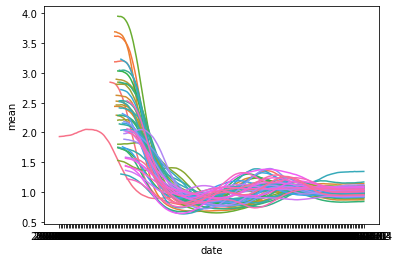

In [79]:
# plot some interesting graphs to visualise
ax = sns.lineplot(x="date", y="mean", hue="state", data=usa_merged_data, legend=False)

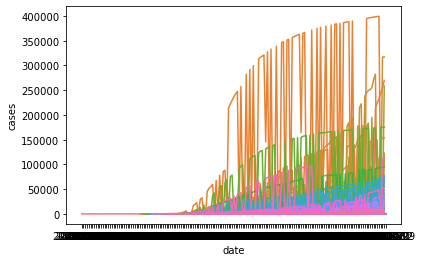

In [80]:
ax = sns.lineplot(x="date", y="cases", hue="state", data=usa_merged_data, legend=False)

### 02vi. Export Data

In [ ]:
# export pre-processed data
usa_merged_data.to_csv('data/usa_merged_data.csv', index=False)

## 03. Feature Engineering

### 03i. Load Data

In [42]:
usa_merged_data = pd.read_csv('data/usa_merged_data.csv')

In [ ]:
print(usa_merged_data.columns)

### 03ii. Create Time Labels

In [ ]:
usa_merged_data['date'] = pd.to_datetime(usa_merged_data['date'])
usa_merged_data['month'] = usa_merged_data['date'].apply(lambda x: x.month)
usa_merged_data['week'] = usa_merged_data['date'].apply(lambda x: x.week)
usa_merged_data['weekday'] = usa_merged_data['date'].apply(lambda x: x.weekday())

### 03iii. Create Lagged Variables

In [ ]:
index_cols = ['date', 'state']
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)

target_vars_to_lag = [ 'mean', 'median', 'lower_80',
                    'upper_80', 'infections', 'test_adjusted_positive',
                    'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests',
                    'new_cases', 'new_deaths']
mobility_vars_to_lag = ['retail_and_recreation_percent_change_from_baseline',
                        'grocery_and_pharmacy_percent_change_from_baseline',
                        'parks_percent_change_from_baseline',
                        'transit_stations_percent_change_from_baseline',
                        'workplaces_percent_change_from_baseline',
                        'residential_percent_change_from_baseline', 'mobility_city_driving',
                        'mobility_city_transit', 'mobility_city_walking',
                        'mobility_county_driving', 'Population Staying at Home', 'Population Not Staying at Home',
                        'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3',
                        'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25',
                        'Number of Trips 25-50', 'Number of Trips 50-100',
                        'Number of Trips 100-250', 'Number of Trips 250-500',
                        'Number of Trips >=500']

for var in target_vars_to_lag:
    for lag_num in range(1,15):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

for var in mobility_vars_to_lag:
    for lag_num in range(7,22):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

In [83]:
print(list(usa_merged_data.columns))

['date', 'region', 'index', 'mean', 'median', 'lower_80', 'upper_80', 'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests', 'new_cases', 'new_deaths', 'state_abbreviation_x', 'state', 'population', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu', 'country_region', 'sub_region_1', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'sub-region', 'mobility_city_driving', 'mobility_city_transit', 'mobility_city_walking', 'mobility_county_driving', 'Level', 'Date_x', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Numb

In [ ]:
# create_lagged_averages
for var in target_vars_to_lag:
    usa_merged_data[var+'_lag_past4days'] = usa_merged_data[var+'_lag_1']+usa_merged_data[var+'_lag_2']+usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']
    usa_merged_data[var+'_lag_pastweek'] = usa_merged_data[var+'_lag_past4days']+usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    
    usa_merged_data[var+'_lag_past4days'] /= 4
    usa_merged_data[var+'_lag_pastweek'] /= 7
    usa_merged_data[var+'_lag_lastweek'] /= 7
    
for var in mobility_vars_to_lag:
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    usa_merged_data[var+'_lag_lastmidweek'] = usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']+usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']
    usa_merged_data[var+'_lag_lastlastweek'] = usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']+usa_merged_data[var+'_lag_18']+usa_merged_data[var+'_lag_19']+usa_merged_data[var+'_lag_20']+usa_merged_data[var+'_lag_21']
    
    usa_merged_data[var+'_lag_lastweek'] /= 7
    usa_merged_data[var+'_lag_lastmidweek'] /= 7
    usa_merged_data[var+'_lag_lastlastweek'] /= 7

In [52]:
# review created lagged variables that will be included into the model
print([i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)])

['mean_lag_past4days', 'mean_lag_pastweek', 'mean_lag_lastweek', 'median_lag_past4days', 'median_lag_pastweek', 'median_lag_lastweek', 'lower_80_lag_past4days', 'lower_80_lag_pastweek', 'lower_80_lag_lastweek', 'upper_80_lag_past4days', 'upper_80_lag_pastweek', 'upper_80_lag_lastweek', 'infections_lag_past4days', 'infections_lag_pastweek', 'infections_lag_lastweek', 'test_adjusted_positive_lag_past4days', 'test_adjusted_positive_lag_pastweek', 'test_adjusted_positive_lag_lastweek', 'test_adjusted_positive_raw_lag_past4days', 'test_adjusted_positive_raw_lag_pastweek', 'test_adjusted_positive_raw_lag_lastweek', 'positive_lag_past4days', 'positive_lag_pastweek', 'positive_lag_lastweek', 'tests_lag_past4days', 'tests_lag_pastweek', 'tests_lag_lastweek', 'new_tests_lag_past4days', 'new_tests_lag_pastweek', 'new_tests_lag_lastweek', 'new_cases_lag_past4days', 'new_cases_lag_pastweek', 'new_cases_lag_lastweek', 'new_deaths_lag_past4days', 'new_deaths_lag_pastweek', 'new_deaths_lag_lastweek', 

### 03iv. Create Season Variables

### 03v. Other Variables

In [53]:
# mean smoothing of outcome variable (ignore zeros by filling from last reported qty)


### 03vi. Export Data

In [54]:
usa_merged_data.to_csv('data/usa_merged_data_fe.csv', index=False)

## 04. Modelling

### 04i. Import Packages

In [61]:
import lightgbm as lgb
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

### 04ii. Load Data

In [60]:
usa_merged_data = pd.read_csv('data/usa_merged_data_fe.csv')

In [62]:
usa_merged_data.columns

Index(['date', 'region', 'index', 'mean', 'median', 'lower_80', 'upper_80',
       'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw',
       ...
       'Number of Trips 50-100_lag_lastlastweek',
       'Number of Trips 100-250_lag_lastweek',
       'Number of Trips 100-250_lag_lastmidweek',
       'Number of Trips 100-250_lag_lastlastweek',
       'Number of Trips 250-500_lag_lastweek',
       'Number of Trips 250-500_lag_lastmidweek',
       'Number of Trips 250-500_lag_lastlastweek',
       'Number of Trips >=500_lag_lastweek',
       'Number of Trips >=500_lag_lastmidweek',
       'Number of Trips >=500_lag_lastlastweek'],
      dtype='object', length=687)

### 04iii. Set Model Variables

In [91]:
# Input variables
data = usa_merged_data.copy()
cat_var = ['month', 'week', 'weekday', 'lockdown_status', 'state']
num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]
# try without past4 info
num_var = [i for i in num_var if '_lag_past4days' not in i]

df_train_columns = cat_var + num_var
for column in cat_var:
    data[column] =  data[column].astype('category')
    
# Outcome variables
target_var = 'mean'

# Define Date Columns
date_variable = 'date'
data[date_variable] = pd.to_datetime(data[date_variable])

### 04iv. Quick Visualisations

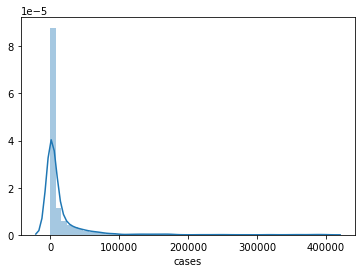

In [92]:
# to review if target_var is too skewed and might be problematic
sns.distplot(data[target_var])

Text(0.5, 1.0, 'Date distribution')

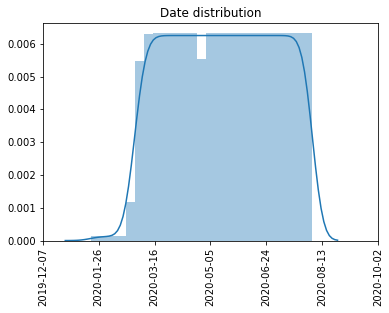

In [93]:
# code solution: https://github.com/mwaskom/seaborn/issues/1059
ordinal_dates = np.array([d.toordinal() for d in data[date_variable]])
sns.distplot(ordinal_dates, kde=True)
ticks_locations, _ = plt.xticks()
labels = [datetime.datetime.fromordinal(int(t)).date() for t in ticks_locations]
plt.xticks(ticks_locations, labels, rotation=90)
plt.title("Date distribution")

### 04v. Train-Test-Val-Split

In [94]:
# Model Parameters
validate_from = '2020-06-01' 
train_till = '2020-07-01'

# Train Test Split
data[date_variable] = pd.to_datetime(data[date_variable])

main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()

train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

# Format data for Model
X_train = train[df_train_columns]
y_train = train[target_var]

X_val = val[df_train_columns]
y_val = val[target_var]

# Ensure sufficient data per set
print(len(train))
print(len(val))
print(len(test))

4846
1530
1785


### 04vi. Train Model

In [95]:
# Create the LightGBM data containers
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
lgb_val = lgb.Dataset(X_val, label=y_val)

# to record eval results for plotting
evals_result = {} 

# Train the model
parameters = {
    'random_state':0,
    'application': 'regression',
    'objective': 'regression',
    'metric': ["mse"],
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 30,
    'max_depth':5,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_iterations': 300
}
# parameters = {
#     'application': 'regression',
#     'objective': 'regression',
#     'metric': ["mse"],
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 500,
#     'feature_fraction': 0.5,
#     'bagging_fraction': 0.5,
#     'bagging_freq': 20,
#     'learning_rate': 0.05,
#     'verbose': 0
# }

model = lgb.train(parameters,
                  lgb_train,
                  valid_sets=lgb_val,
                  num_boost_round=100,
                  evals_result=evals_result,
                  early_stopping_rounds=30)

[1]	valid_0's l2: 2.56701e+09
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 2.5377e+09
[3]	valid_0's l2: 2.50181e+09
[4]	valid_0's l2: 2.39964e+09
[5]	valid_0's l2: 2.30714e+09
[6]	valid_0's l2: 2.22822e+09
[7]	valid_0's l2: 2.21443e+09
[8]	valid_0's l2: 2.19657e+09
[9]	valid_0's l2: 2.13171e+09
[10]	valid_0's l2: 2.11551e+09
[11]	valid_0's l2: 2.05352e+09
[12]	valid_0's l2: 2.04712e+09
[13]	valid_0's l2: 2.02856e+09
[14]	valid_0's l2: 1.97849e+09
[15]	valid_0's l2: 1.96945e+09
[16]	valid_0's l2: 1.92608e+09
[17]	valid_0's l2: 1.89523e+09
[18]	valid_0's l2: 1.8635e+09
[19]	valid_0's l2: 1.82959e+09
[20]	valid_0's l2: 1.83104e+09
[21]	valid_0's l2: 1.83019e+09
[22]	valid_0's l2: 1.8011e+09
[23]	valid_0's l2: 1.79984e+09
[24]	valid_0's l2: 1.77126e+09
[25]	valid_0's l2: 1.77033e+09
[26]	valid_0's l2: 1.74919e+09
[27]	valid_0's l2: 1.72609e+09
[28]	valid_0's l2: 1.72684e+09
[29]	valid_0's l2: 1.7308e+09
[30]	valid_0's l2: 1.71259e+09
[31]	valid_0's l2: 1.7

### 04vii. Predict & Review

##### Create RMSE Functions

In [96]:
# Baseline Error
def get_rmse(predicted, actual):
    rmse = ((predicted - actual) ** 2).mean() ** .5
    return rmse

import matplotlib.pyplot as plt
        
def plot_relation(predicted, actual, xlimit=0, ylimit=5):
    plt.figure(figsize=(10, 5))
    
    df_pred = pd.DataFrame({'Actual Outcome':actual, \
                            'Predict Outcome': predicted})

    plt.scatter(df_pred['Actual Outcome'], df_pred['Predict Outcome'])

    plt.xlabel('Actual Outcome')
    plt.ylabel('Predict Outcome')
    plt.plot([xlimit,ylimit], [xlimit,ylimit], 'r--', label='Reference Line')
    plt.show()

Train:  20301.503294789327


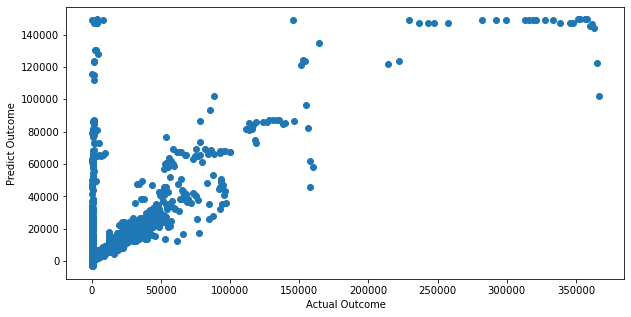

Validate:  40624.454259801976


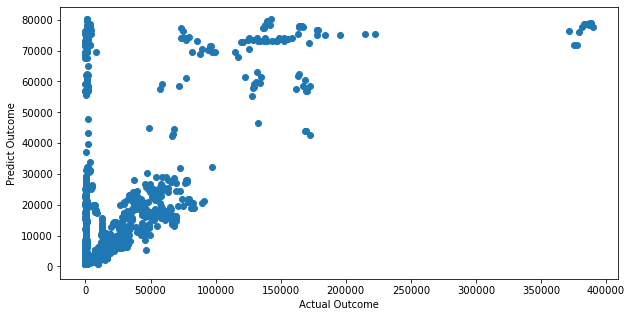

Test:  58434.90998455408


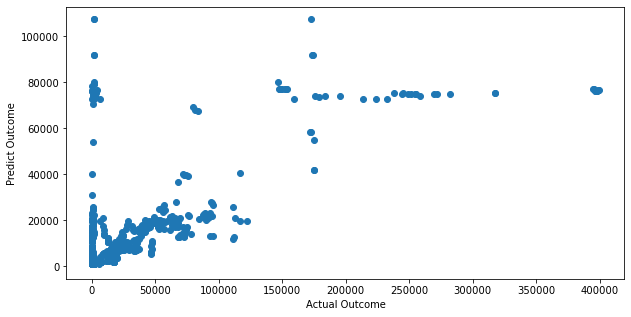

In [97]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(test[df_train_columns])

# Visualise
print('Train: ', get_rmse(y_train_pred, y_train))
plot_relation(y_train_pred, y_train, xlimit=0)

print('Validate: ', get_rmse(y_val_pred, y_val))
plot_relation(y_val_pred, y_val, xlimit=0)

print('Test: ', get_rmse(y_test_pred, test[target_var]))
plot_relation(y_test_pred, test[target_var], xlimit=0)

##### Visualise feature importance

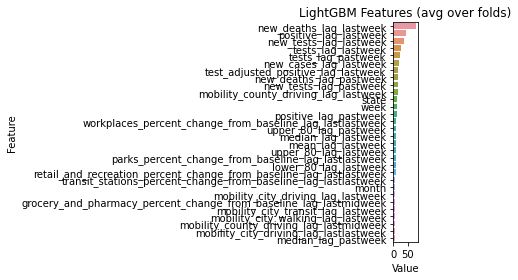

In [98]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
#     plt.figure(figsize=(40, 20))
#     sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(model, X_train, num=30)